<a href="https://colab.research.google.com/github/A-keerthana/Handwritten-Number-Recognition/blob/main/Number_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/Handwritten Number Recognition"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv.zip
train.csv.zip



In [2]:
train = pd.read_csv('/content/drive/MyDrive/Handwritten Number Recognition/train.csv.zip')
test = pd.read_csv('/content/drive/MyDrive/Handwritten Number Recognition/test.csv.zip')

In [3]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


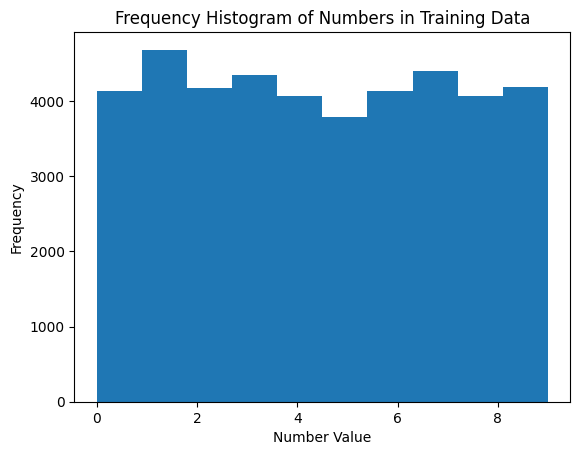

In [5]:
import matplotlib.pyplot as plt
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")
plt.show()

In [6]:
label_train=train['label']
train=train.drop('label', axis=1)

In [7]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# data normalisation
train = train/255
test = test/255

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, label_train, train_size = 0.8,random_state = 42)

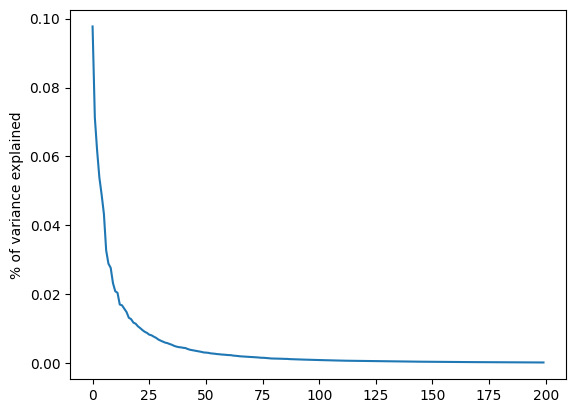

In [10]:
from sklearn import decomposition

## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
plt.show()

#plot reaches asymptote at around 100, which is optimal number of PCs to use.

## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=100)
pca.fit(X_train)
PCtrain = pca.transform(X_train)
PCval = pca.transform(X_val)

#decompose test data
PCtest = pca.transform(test)

In [11]:
X_train= PCtrain

In [12]:
X_cv = PCval

In [13]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)

SVC()

In [14]:
predicted = clf.predict(X_cv)
expected = y_val

In [15]:
print(predicted[0:30])

[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 4 3 3 6 4 9 5 2 6 0 0 0 8 6 3]


In [16]:
from sklearn import  metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.98      0.98       846
           3       0.97      0.97      0.97       937
           4       0.97      0.97      0.97       839
           5       0.98      0.97      0.97       702
           6       0.98      0.99      0.99       785
           7       0.98      0.97      0.98       893
           8       0.97      0.98      0.97       835
           9       0.96      0.97      0.96       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400




In [17]:
print('accurcy :',metrics.accuracy_score(expected, predicted))

accurcy : 0.9782142857142857


In [18]:
output_label = clf.predict(PCtest)

In [19]:
output = pd.DataFrame(output_label,columns = ['Label'])
output.reset_index(inplace=True)
output['index'] = output['index'] + 1
output.rename(columns={'index': 'ImageId'}, inplace=True)
output.to_csv('output.csv', index=False)
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
